# <center><strong>Metode Numerik</strong><br /><strong><span style="color: blue;">Curve Fitting</span></strong><br /><img style="" src="images/MetNum.png" alt="" /></center>

<h2 id="(C)-Taufik-Sutanto---2019" style="text-align: center;">(C) Taufik Sutanto - 2020</h2>
<h2 id="tau-data-Indonesia-~-https://tau-data.id" style="text-align: center;">tau-data Indonesia ~ <a href="https://tau-data.id/mfds-nm-06/" target="_blank"><span style="color: #0009ff;">https://tau-data.id/mfds-nm-06/</span></a></h2>

## Outline:

* Pendahuluan
* Linear Least Squares
* Exercise 1
* Power Fit
* Exercise 2
* Curve Fitting
* Exercise 3

<p><img alt="" src="images/V_1_Solar_System.jpg" style="width: 800px; height: 348px;" /></p>

<ul>
	<li>Johannes Keppler 1601 - Jarak Matahari ke Merkurius, Venus, Bumi, Mars</li>
	<li>Third law of Planetary Motions : <span class="MathJax_Preview" style="color: inherit;"><span class="MJXp-math" id="MJXp-Span-1689"><span class="MJXp-mi MJXp-italic" id="MJXp-Span-1690">T</span><span class="MJXp-mo" id="MJXp-Span-1691" style="margin-left: 0.333em; margin-right: 0.333em;">=</span><span class="MJXp-mi MJXp-italic" id="MJXp-Span-1692">C</span><span class="MJXp-msubsup" id="MJXp-Span-1693"><span class="MJXp-mi MJXp-italic" id="MJXp-Span-1694" style="margin-right: 0.05em;">X</span><span class="MJXp-mrow MJXp-script" id="MJXp-Span-1695" style="vertical-align: 0.5em;"><span class="MJXp-mi MJXp-italic" id="MJXp-Span-1696">A</span></span></span></span></span><script type="math/tex" id="MathJax-Element-99">T = C X^{A}</script></li>
	<li>C = 0.1997, A = 3/2</li>
</ul>


## Garis *Least Squares*
* $y = f(x) = Ax + b$ ==> Interpolasi (kita sudah bahas ini)
* Namun eksperimen (permasalahan di dunia nyata/sains) hampir selalu mengandung kesalahan (error)
* $y_k = f(x_k) + \epsilon_k$ untuk $k \in I$ (deviasi / Residual)
* Kita sudah pernah menghitung deviasi pendekatan dan nilai sesungguhnya (error absolut dan relatif), namun bagaimana mengukur error di beberapa pengukuran?

<p><img alt="" src="images/residual_norms.png" style="width: 800px; height: 336px;" /></p>

<p>* Contoh?</p>


<p><img alt="" src="images/V_2_Residual_Norms.png" style="width: 800px; height: 223px;" /></p>


<h2 id="Least-Squares-Line">Least Squares Line</h2>

<p><img alt="" src="images/V_3_Plot_LSL.png" style="width: 600px; height: 434px;" /></p>

<p><img alt="" src="images/V_3_Plot_LSL_teo.png" style="width: 800px ; height: 348px" /></p>

<ul>
	<li>Bukti?</li>
	<li>Contoh?</li>
</ul>


<p><img alt="" src="images/V_4_LSL_eg.png" style="width: 800px; height: 309px;" /></p>


In [1]:
import numpy as np, matplotlib as mpl, matplotlib.pyplot as plt
from numpy import polyfit, poly1d

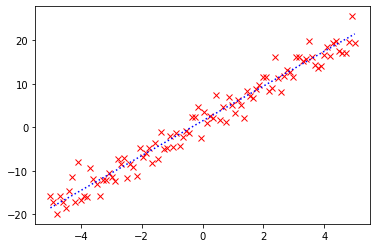

In [2]:
%matplotlib inline

x = np.linspace(-5, 5, 100)
y = 4 * x + 1.5

noise_y = y + np.random.randn(y.shape[-1]) * 2.5

p = plt.plot(x, noise_y, 'rx')
p = plt.plot(x, y, 'b:')

In [4]:
coeff = polyfit(x, noise_y, 1)
coeff

array([3.95088665, 1.32447682])

In [5]:
X = [-1, 0, 1, 2, 3, 4, 5, 6]
Y = [10, 9, 7, 5, 4, 3, 0, -1]
polyfit(X, Y, 1)

array([-1.60714286,  8.64285714])

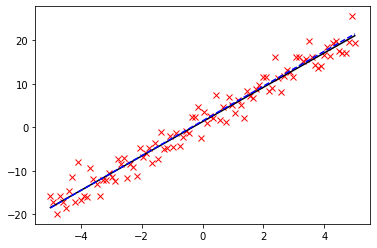

In [6]:
p = plt.plot(x, noise_y, 'rx')

p = plt.plot(x, coeff[0] * x + coeff[1], 'k-')

p = plt.plot(x, y, 'b--')

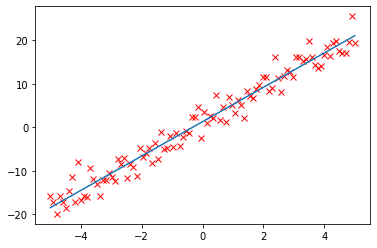

In [7]:
# Lebih sederhana
f = poly1d(coeff)
p = plt.plot(x, noise_y, 'rx')
p = plt.plot(x, f(x))

In [8]:
print(f)

 
3.951 x + 1.324


<h2 id="The-Power-Fit-$y-=-AX^M$">The Power Fit <span class="MathJax_Preview" style="color: inherit;"><span class="MJXp-math" id="MJXp-Span-1712"><span class="MJXp-mi MJXp-italic" id="MJXp-Span-1713">y</span><span class="MJXp-mo" id="MJXp-Span-1714" style="margin-left: 0.333em; margin-right: 0.333em;">=</span><span class="MJXp-mi MJXp-italic" id="MJXp-Span-1715">A</span><span class="MJXp-msubsup" id="MJXp-Span-1716"><span class="MJXp-mi MJXp-italic" id="MJXp-Span-1717" style="margin-right: 0.05em;">X</span><span class="MJXp-mi MJXp-italic MJXp-script" id="MJXp-Span-1718" style="vertical-align: 0.5em;">M</span></span></span></span><script type="math/tex" id="MathJax-Element-103">y = AX^M</script></h2>

<ul>
	<li><img alt="" src="images/V_4_Power_FIt_Theo.png" style="width: 600px; height: 146px;" /></li>
	<li>Bukti? Contoh?</li>
</ul>


<p><img alt="" src="images/V_4_Power_FIt_eg.png" style="width: 800px; height: 452px;" /></p>


In [9]:
tk = [0.2, 0.4, 0.6, 0.8, 1.0]
dk = [0.196, 0.785, 1.766, 3.14, 4.907]
dktk2 = [d*t**2 for d,t in zip(dk, tk)]
tk4 = [t**4 for t in tk]

A = sum(dktk2)/sum(tk4)
2*A

9.813329928498469

## Curve Fitting - Data Linearization Method for $y = C e^{Ax}$

<p><img alt="" src="images/V_4_Curve_Fit.png" style="width: 600px; height: 230px;" /></p>


<p><img alt="" src="images/V_4_Curve_Fit_Linearization_Methods.png" style="width: 600px; height: 412px;" /></p>


<p><img alt="" src="images/linearization_method_ex_1.png" /></p>




<p><img alt="" src="images/linearization_method_ex_2.png" /></p>

## NonLinear Curve Fitting
<p><img alt="" src="images/V_4_Curve_Fit_NonLinear.png" style="width: 600px; height: 553px;" /></p>


<p><img alt="" src="images/Non_Linear_Least_Square_Method.png" /></p>

In [10]:
import numpy as np
from scipy.optimize import minimize


def f(x):
    A, C = x[0], x[1] # agar mudah dimengerti
    return (C-1.5)**2 + (C*np.exp(A) - 2.5)**2 + (C*np.exp(2*A) - 3.5)**2 + (C*np.exp(3*A) - 5.0)**2 + (C*np.exp(4*A) - 7.5)**2

In [11]:
x0 = [1,1]
res = minimize(f, x0)

In [12]:
res.x

array([0.38357506, 1.61086915])

<h2 id="Polynomial-Fitting">Polynomial Fitting</h2>

<p><img alt="" src="images/V_4_Curve_Fit_Polynomial.png" style="width: 600px; height: 293px;" /></p>


<p><img alt="" src="images/poly_fitting_1.png" /></p>
<p><img alt="" src="images/poly_fitting_2.png" /></p>

<h3>End of Module</h3>
<hr />
...